In [11]:
# kNN classifier

# ----------------------- K nearest neighbor classification -------------------------#

# The principle behind nearest neighbor methods is to find a predefined number
# of training samples closest in distance to the new point, and predict the label
# from these. The number of samples can be a user-defined constant(k-nearest neighbor learning),
# or vary based on the local density of points(radius-based neighbor learning).
# The distance can, in general, be any metric measure: standard Euclidean distance is the
# most common choice.
# Neighbors-based methods are known as non-generalizing machine learning methods,
# since they simply “remember” all of its training data(possibly transformed into a
#  fast indexing structure such as a Ball Tree or KD Tree).
# Despite its simplicity, nearest neighbors has been successful in a large number of classification
# and regression problems, including handwritten digits and satellite image scenes.
# Being a non-parametric method, it is often successful in classification situations where
# the decision boundary is very irregular.


In [12]:
# Find euclidean distance from point p to any adjecent point
import numpy as np
def distance(p1,p2):
     """ Find distance between points p1 and p2."""
     return np.sqrt(np.sum(np.power(p1-p2,2)))


[2.3430749  1.7        1.5132746  1.86815417 0.94339811 0.53851648
 1.86815417 0.94339811 0.53851648]


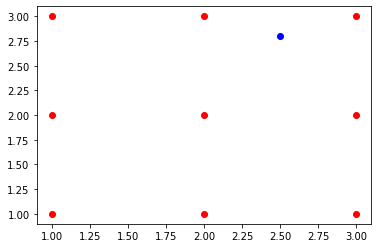

In [13]:
points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [
                  2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
p = np.array([2.5, 2.8])
distances=np.zeros(points.shape[0])
for i,point in enumerate(points):
    distances[i]= distance(p,point)
print(distances)

# lets try to visulize the points
import matplotlib.pyplot as plt 
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0], p[1], 'bo')

In [14]:
# Find nearest neighbour
ind = np.argsort(distances)
ind

array([5, 8, 4, 7, 2, 1, 3, 6, 0])

In [15]:
points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [
                  2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
p = np.array([2.5, 2.8])
   
# We could sort the distances array to give us shorter distances,
# but instead what we really would like to get
# is an index vector that would sort the array.
# If we had that, we could take the first K elements of that array,
# and know that the corresponding points are the K closest
# points to our point of interest p.
# Fortunately, this function exists in NumPy and it's called argsort.
# sort the distance for k pointsthat are nearest
def find_nearest_points(points,p,k):
    """
    Find k nearest points from point p and return their indices.
    """
    distances=np.zeros(points.shape[0])
    for i,point in enumerate(points):
        distances[i]= distance(p,point)
    ind = np.argsort(distances)
    return ind[0:k]
ind = find_nearest_points(points,p,k=3)

## Majority Vote



In [16]:
votes = [1,1,2,8,7,7,9,8,7,7,5,1]
votes_counts = {}
for vote in votes:
    if vote in votes_counts:
        votes_counts[vote]+=1
    else:
        votes_counts[vote]=1
print (votes_counts)
def votes_counts(votes):
    """
    To count all votes and return count for each number of vote.
    """
    votes_counts = {}
    for vote in votes:
        if vote in votes_counts:
            votes_counts[vote]+=1
        else:
            votes_counts[vote]=1
    return votes_counts
votes_count = votes_counts(votes)
max_vote = max(votes_count.values())
winner = []

for votes, count in votes_count.items():
    if count == max_vote:
        winner.append(votes)
winner

{1: 3, 2: 1, 8: 2, 7: 4, 9: 1, 5: 1}


[7]

In [17]:
import random
def majority_votes(votes):
    """
    Find which vote has maximum count and return that vote as winner 
    for majority votes.
    If we have more than 1 winner it choose 1 winner at random and give that as winner.
    """
    votes_count = votes_counts(votes)
    max_vote = max(votes_count.values())
    winner = []
    for votes, count in votes_count.items():
        if count == max_vote:
            winner.append(votes)
    return random.choice(winner)
votes = [1,1,1,0,0,0,1,0,1]  
majority_votes(votes)

1

In [18]:
# predict class of function 
outcomes = np.array([0,0,0,0,1,1,1,1,1]) # it shoud be same as size of sample points
def knn_predict(points,p,k,outcomes):
    """
     To find k nearest neghbour and predict the point p belongs to which class
     by checking majority of points belongs to that class for k neighbours and return that class 
     """
    ind =find_nearest_points(points,p,k)
    # predict the class or catagory based on majority votes
    return majority_votes(outcomes[ind])

#  Generate synthetic data

#### Lets generate function where first n points belongs to class o and nextn point belongs to class 1. This data is called as synnthetic data s we are generating them with the help of computer. we'll generate predictors from two *bivariate normal distributions*, where the first distribution gives rise to observations belonging to class 0, and the second gives rise to observations belonging to class 1. The word bivariate means two variable like x and y. If it were generating say, just the x variables, then we'd be dealing with univariate data. To generate the synthetic data, we'll be using this 

In [19]:
import scipy.stats as ss
###We'd like to generate in this example, 5 rows and 2 columns of observations coming from this particular normal distribution.
ss.norm(0,1).rvs((5,2))

array([[ 0.44509427,  0.93576541],
       [-1.39216833, -0.0256423 ],
       [ 1.32305479,  2.03322566],
       [ 0.42072883, -0.46997897],
       [ 2.39043279,  0.22672263]])

In [20]:
np.concatenate((ss.norm(0,1).rvs((5,2)),ss.norm(1,1).rvs((5,2))),axis=0)

array([[-0.78302498, -0.27787487],
       [-0.56827265, -0.03830684],
       [ 0.2937108 , -1.59715168],
       [-1.09135894,  0.83995287],
       [ 1.78432061, -1.79218471],
       [ 1.33562505,  1.96434714],
       [ 0.62463802, -1.35235446],
       [ 0.69032911,  1.89558472],
       [ 2.04701266,  0.21314381],
       [ 0.42070357,  1.18170812]])

In [21]:
# to generate outcomes
n=50
outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)),axis=0)

In [22]:
points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)

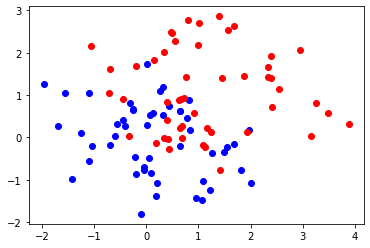

In [23]:
plt.plot(points[0:n,0],points[0:n,1],"ob")
plt.plot(points[n:,0],points[n:,1],"ro")

In [24]:
def generate_synthetic_data(n):
    """
    Generate synthetic data which belongs to class o and class 1 and
    return tuple of points and outcomes.
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)),axis=0)
    return (points,outcomes)
generate_synthetic_data(5)

(array([[ 1.28042949,  1.13152226],
        [-0.18544171,  0.07588875],
        [ 0.21287888, -0.54626105],
        [-0.47508839, -1.93907045],
        [-1.15470184,  0.08363387],
        [ 0.05640735,  0.63638358],
        [ 0.40087958, -0.09110591],
        [-1.09236899,  0.10374001],
        [ 1.91631691,  1.35718921],
        [ 1.01091694,  0.97101969]]),
 array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]))

# Making a Prediction grid
       Learn how to make a prediction grid
       Learn how to use enumerate
       Learn how to use NumPy meshgrid

In [25]:
# use of enumarate
name = ["abc","def","ghi","jkl"]
list(enumerate(name))
for i, value in enumerate(name):
    print (i,value)

0 abc
1 def
2 ghi
3 jkl


In [26]:
# making grid
def make_prediction_grid(limits,h,points,outcomes,k):
    """
    For each point in mesh we predict the class it belongs and return 
    x and y coardinate along with class as tuple (x,y,class).
    """
    (xmin,xmax,ymin,ymax)=limits
    xs=np.arange(xmin,xmax,h)
    ys = np.arange(ymin,ymax,h)
    xx , yy = np.meshgrid(xs,ys)

    prediction_grid = np.zeros(xx.shape,dtype=int)
    
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i]=knn_predict(points,p,k,outcomes)
    return (xx,yy,prediction_grid)



In [27]:
(predictors,outcomes) = generate_synthetic_data(50)
limits=(-3,4,-3,4)
h=0.1
(xx,yy,prediction_grid)= make_prediction_grid(limits,h,points,outcomes,3)
print(xx,yy,prediction_grid)

[[-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 ...
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]] [[-3.  -3.  -3.  ... -3.  -3.  -3. ]
 [-2.9 -2.9 -2.9 ... -2.9 -2.9 -2.9]
 [-2.8 -2.8 -2.8 ... -2.8 -2.8 -2.8]
 ...
 [ 3.7  3.7  3.7 ...  3.7  3.7  3.7]
 [ 3.8  3.8  3.8 ...  3.8  3.8  3.8]
 [ 3.9  3.9  3.9 ...  3.9  3.9  3.9]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [28]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid,cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1],c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    #plt.savefig(filename)

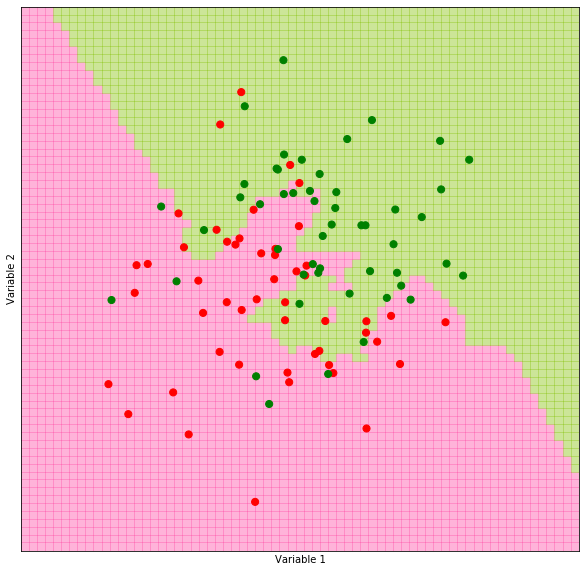

In [29]:

plot_prediction_grid(xx,yy,prediction_grid)

### Apply the homemade kNN classifier to a real dataset and Compare the performance of the homemade kNN classifier to the performance of the kNN classifier from the scikit-learn module


In [43]:
# scikit learn
from sklearn import datasets
iris = datasets.load_iris()
#iris

In [44]:
predictors = iris.data[:,0:2]
outcomes = iris.target

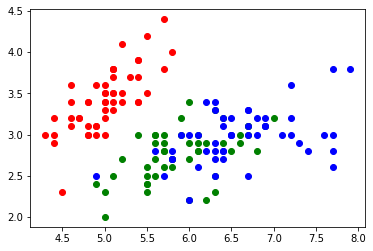

In [45]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("irish_data.pdf")

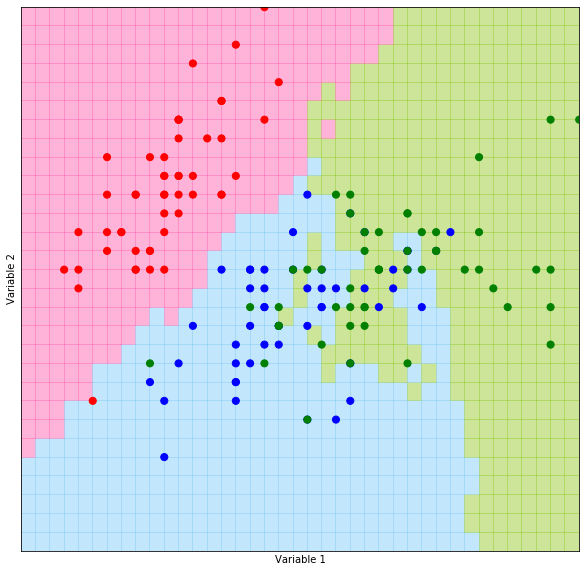

In [46]:
limits = (4, 8, 1.5, 4.5)
h = 0.1
k = 5
filename = "iris_grid_50.pdf"
(xx, yy, predictors_grid) = make_prediction_grid(
    limits, h, predictors, outcomes, k)
plot_prediction_grid(xx, yy, predictors_grid)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors,outcomes)
sk_prediction = knn.predict(predictors)
sk_prediction.shape

(150,)

In [50]:
my_prediction = np.array([knn_predict(predictors,p,5,outcomes) for p in predictors ])
my_prediction.shape

(150,)

In [55]:
print ("MyKnn comapred to Scikit= ",np.mean((sk_prediction ==my_prediction)*100))

96.0


In [56]:
print (np.mean((sk_prediction ==outcomes)*100))

83.33333333333333


In [57]:
print (np.mean((my_prediction ==outcomes)*100))

84.66666666666667
